In [3]:
import pandas as pd

In [4]:
# Load the split datasets
df= pd.read_csv('Premier_League_Season_With_Team_IDs.csv')

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

In [6]:
df

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,WHA,PSCH,PSCD,PSCA,GoalDiff_HT,GoalDiff_FT,TotalHomeShots,TotalAwayShots,HomeTeam_ID,AwayTeam_ID
0,2015,Bournemouth,Aston Villa,0,1,A,0,0,D,M Clattenburg,...,4.00,1.82,3.88,4.70,0,-1,13,10,0,10
1,2015,Chelsea,Swansea,2,2,D,2,1,H,M Oliver,...,10.00,1.37,5.04,10.88,1,0,14,28,1,13
2,2015,Everton,Watford,2,2,D,0,1,A,M Jones,...,5.00,1.75,3.76,5.44,-1,0,15,16,2,15
3,2015,Leicester,Sunderland,4,2,H,3,0,H,L Mason,...,2.70,1.79,3.74,5.10,3,2,27,15,3,12
4,2015,Man United,Tottenham,1,0,H,1,0,H,J Moss,...,6.00,1.64,4.07,6.04,1,1,10,13,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,2024,Nott'm Forest,Bournemouth,1,1,D,1,0,H,M Oliver,...,2.80,2.24,3.50,3.37,1,0,22,17,31,0
3426,2024,West Ham,Aston Villa,1,2,A,1,1,D,T Harrington,...,2.75,2.54,3.51,2.86,0,-1,17,18,16,10
3427,2024,Brentford,Crystal Palace,2,1,H,1,0,H,S Barrott,...,2.88,2.92,3.24,2.66,1,1,14,20,30,17
3428,2024,Chelsea,Man City,0,2,A,0,1,A,A Taylor,...,1.83,3.86,3.91,1.97,-1,-2,13,16,1,18


In [7]:
print(df.columns)

Index(['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'PSCH', 'PSCD', 'PSCA', 'GoalDiff_HT',
       'GoalDiff_FT', 'TotalHomeShots', 'TotalAwayShots', 'HomeTeam_ID',
       'AwayTeam_ID'],
      dtype='object')


# Based Model

In [8]:

# Feature selection (using match stats, removing betting odds)
features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
X = df[features]
y = df['FTR']  # Target: Full-time result (Home win 'H', Draw 'D', Away win 'A')

# Encode the target variable (convert 'H', 'D', 'A' to 0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data by season (using Season column for the split)
train_df = df[df['Season'] != 2024]  # All seasons except 2024 for training
test_df = df[df['Season'] == 2024]   # Only 2024 season for testing

# Features and target for training and testing
X_train = train_df[features]
y_train = label_encoder.fit_transform(train_df['FTR'])
X_test = test_df[features]
y_test = label_encoder.transform(test_df['FTR'])

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize dictionary to store models and results
models = {}
results = {}

# 1. Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_balanced, y_train_balanced)
y_pred_lr = lr.predict(X_test)
models['Logistic Regression'] = lr
results['Logistic Regression'] = classification_report(y_test, y_pred_lr, output_dict=True)

# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf.predict(X_test)
models['Random Forest'] = rf
results['Random Forest'] = classification_report(y_test, y_pred_rf, output_dict=True)

# 3. Gradient Boosting - XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = xgb.predict(X_test)
models['XGBoost'] = xgb
results['XGBoost'] = classification_report(y_test, y_pred_xgb, output_dict=True)

# 4. Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm.predict(X_test)
models['SVM'] = svm
results['SVM'] = classification_report(y_test, y_pred_svm, output_dict=True)

# 5. Neural Network (MLP)
mlp = MLPClassifier(random_state=42, max_iter=300)
mlp.fit(X_train_balanced, y_train_balanced)
y_pred_mlp = mlp.predict(X_test)
models['Neural Network (MLP)'] = mlp
results['Neural Network (MLP)'] = classification_report(y_test, y_pred_mlp, output_dict=True)

# 6. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_balanced, y_train_balanced)
y_pred_knn = knn.predict(X_test)
models['KNN'] = knn
results['KNN'] = classification_report(y_test, y_pred_knn, output_dict=True)

# Output the classification reports for all models
for model_name, model in models.items():
    print(f"\n{model_name} Results:")
    
    # Predicting on the test set
    y_pred = model.predict(X_test)
    
    # Printing the classification report
    print(classification_report(y_test, y_pred))

C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59        64
           1       0.34      0.41      0.37        49
           2       0.78      0.70      0.74        89

    accuracy                           0.59       202
   macro avg       0.57      0.57      0.57       202
weighted avg       0.61      0.59      0.60       202


Random Forest Results:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60        64
           1       0.29      0.18      0.23        49
           2       0.66      0.71      0.68        89

    accuracy                           0.56       202
   macro avg       0.50      0.52      0.50       202
weighted avg       0.54      0.56      0.55       202


XGBoost Results:
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        64
           1       0.31      0.22      0.26        49
   

In [18]:
from tabulate import tabulate  # For creating a table
from sklearn.metrics import accuracy_score

# Fit models, collect metrics
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    metrics.append([name, accuracy, precision, recall, f1_score])

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Print the table
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+----+----------------------+------------+-------------+----------+------------+
|    | Model                |   Accuracy |   Precision |   Recall |   F1 Score |
+====+======================+============+=============+==========+============+
|  0 | Logistic Regression  |   0.618812 |    0.568754 | 0.553808 |   0.52327  |
+----+----------------------+------------+-------------+----------+------------+
|  1 | Random Forest        |   0.584158 |    0.513686 | 0.518681 |   0.487949 |
+----+----------------------+------------+-------------+----------+------------+
|  2 | XGBoost              |   0.569307 |    0.509758 | 0.51688  |   0.508811 |
+----+----------------------+------------+-------------+----------+------------+
|  3 | SVM                  |   0.584158 |    0.520474 | 0.508046 |   0.458301 |
+----+----------------------+------------+-------------+----------+------------+
|  4 | Neural Network (MLP) |   0.549505 |    0.496035 | 0.49751  |   0.489042 |
+----+----------------------

C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# Tuned Model

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Neural Networks': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'learning_rate_init': [0.001, 0.01]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'metric': ['euclidean', 'manhattan']
    }
}

# Create tuned models dictionary
tuned_models = {}

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
grid_log_reg = GridSearchCV(log_reg, param_grids['Logistic Regression'], cv=5)
grid_log_reg.fit(X_train_balanced, y_train_balanced)
tuned_models['Logistic Regression'] = grid_log_reg.best_estimator_

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grids['Random Forest'], cv=5)
grid_rf.fit(X_train_balanced, y_train_balanced)
tuned_models['Random Forest'] = grid_rf.best_estimator_

# XGBoost
xgb = XGBClassifier(random_state=42)
grid_xgb = GridSearchCV(xgb, param_grids['XGBoost'], cv=5)
grid_xgb.fit(X_train_balanced, y_train_balanced)
tuned_models['XGBoost'] = grid_xgb.best_estimator_

# SVM
svm = SVC()
grid_svm = GridSearchCV(svm, param_grids['SVM'], cv=5)
grid_svm.fit(X_train_balanced, y_train_balanced)
tuned_models['SVM'] = grid_svm.best_estimator_

# Neural Network (MLP)
mlp = MLPClassifier(max_iter=300)
grid_mlp = GridSearchCV(mlp, param_grids['Neural Networks'], cv=5)
grid_mlp.fit(X_train_balanced, y_train_balanced)
tuned_models['Neural Networks'] = grid_mlp.best_estimator_

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grids['KNN'], cv=5)
grid_knn.fit(X_train_balanced, y_train_balanced)
tuned_models['KNN'] = grid_knn.best_estimator_

# Now you have the best tuned models in `tuned_models`

C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

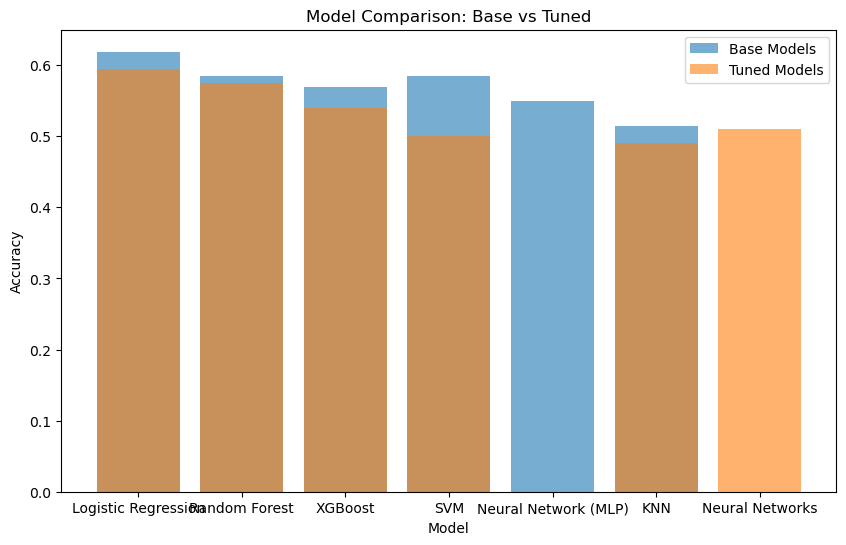

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Initialize dictionaries to store accuracy results
base_results = {}
tuned_results = {}

# Extract accuracy from the classification report for base models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    base_results[model_name] = report['accuracy']

# Assuming 'tuned_models' is another dictionary with tuned models
# For simplicity, let's say tuned_models exist similar to base models
for model_name, model in tuned_models.items():  # Add your tuned models here
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    tuned_results[model_name] = report['accuracy']

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(base_results.keys(), base_results.values(), alpha=0.6, label='Base Models')
plt.bar(tuned_results.keys(), tuned_results.values(), alpha=0.6, label='Tuned Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Base vs Tuned')
plt.legend()
plt.show()

In [21]:
from tabulate import tabulate  # For creating a table
from sklearn.metrics import accuracy_score

# Fit models, collect metrics
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    metrics.append([name, accuracy, precision, recall, f1_score])

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Print the table
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

+----+----------------------+------------+-------------+----------+------------+
|    | Model                |   Accuracy |   Precision |   Recall |   F1 Score |
+====+======================+============+=============+==========+============+
|  0 | Logistic Regression  |   0.618812 |    0.568754 | 0.553808 |   0.52327  |
+----+----------------------+------------+-------------+----------+------------+
|  1 | Random Forest        |   0.584158 |    0.513686 | 0.518681 |   0.487949 |
+----+----------------------+------------+-------------+----------+------------+
|  2 | XGBoost              |   0.569307 |    0.509758 | 0.51688  |   0.508811 |
+----+----------------------+------------+-------------+----------+------------+
|  3 | SVM                  |   0.584158 |    0.520474 | 0.508046 |   0.458301 |
+----+----------------------+------------+-------------+----------+------------+
|  4 | Neural Network (MLP) |   0.549505 |    0.496035 | 0.49751  |   0.489042 |
+----+----------------------

C:\Users\GG\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# Print the shape of the balanced training data
print(f"Shape of X_train_balanced: {X_train_balanced.shape}")

# If X_train_balanced is a numpy array, use slicing
print("First few rows of X_train_balanced:")
print(X_train_balanced[:5])  # Adjust the number of rows as needed


Shape of X_train_balanced: (4353, 12)
First few rows of X_train_balanced:
[[-0.49571234 -0.88242013 -1.03477926 -0.40817436  0.72598046  0.60173919
   0.0896455  -0.61942101  1.12657454  1.75621697 -0.23010797 -0.25470313]
 [-0.49571234  1.34230111 -0.65433878  2.56702174  1.30987604  1.44321823
  -0.55990707  1.21430149 -0.48039966  0.97599836  3.96643734 -0.25470313]
 [-0.67209676 -0.07343059  0.10654219  0.44188167 -1.02570629  0.60173919
   0.73919806 -0.98616551 -0.48039966  0.19577976 -0.23010797 -0.25470313]
 [ 0.915363   -0.27567797  1.24786364  0.44188167  0.72598046  1.72371124
   0.0896455  -0.61942101  0.32308744  1.75621697 -0.23010797 -0.25470313]
 [-0.84848118 -0.47792536 -1.41521974  0.01685365  0.43403267  0.32124618
  -1.53423592 -0.98616551  0.32308744  0.97599836 -0.23010797 -0.25470313]]


# Checking Learning Curves

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],  # Regularization parameter
        'solver': ['lbfgs', 'liblinear']  # Optimization algorithm
    },
    'Random Forest': {
        'n_estimators': [100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
    },
    'XGBoost': {
        'n_estimators': [100, 200],  # Number of boosting rounds
        'max_depth': [3, 5, 7],  # Maximum depth of the trees
        'learning_rate': [0.01, 0.1]  # Step size shrinkage
    },
    'SVM': {
        'C': [0.1, 1, 10],  # Regularization parameter
        'kernel': ['linear', 'rbf'],  # Kernel type
        'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
    },
    'Neural Networks': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Size of hidden layers
        'activation': ['relu', 'tanh'],  # Activation function
        'solver': ['adam', 'sgd']  # Optimization algorithm
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],  # Number of neighbors to use
        'weights': ['uniform', 'distance']  # Weight function used in prediction
    }
}

# Define function to plot learning curves
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation score")
    
    plt.legend(loc="best")
    plt.show()

# Create tuned models dictionary
tuned_models = {}

# Measure and log time for model tuning
def time_model_tuning(model_name, model, param_grid, X_train, y_train):
    start_time = time.time()
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    duration = end_time - start_time
    print(f"{model_name} tuning took {duration:.2f} seconds")
    return grid_search.best_estimator_

# Scale features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)


# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
grid_log_reg = GridSearchCV(log_reg, param_grids['Logistic Regression'], cv=5)
grid_log_reg.fit(X_train_balanced, y_train_balanced)
tuned_models['Logistic Regression'] = grid_log_reg.best_estimator_

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grids['Random Forest'], cv=5)
grid_rf.fit(X_train_balanced, y_train_balanced)
tuned_models['Random Forest'] = grid_rf.best_estimator_

# XGBoost
xgb = XGBClassifier(random_state=42)
grid_xgb = GridSearchCV(xgb, param_grids['XGBoost'], cv=5)
grid_xgb.fit(X_train_balanced, y_train_balanced)
tuned_models['XGBoost'] = grid_xgb.best_estimator_

# SVM
svm = SVC()
grid_svm = GridSearchCV(svm, param_grids['SVM'], cv=5)
grid_svm.fit(X_train_balanced, y_train_balanced)
tuned_models['SVM'] = grid_svm.best_estimator_

# Neural Network (MLP)
mlp = MLPClassifier(max_iter=300)
grid_mlp = GridSearchCV(mlp, param_grids['Neural Networks'], cv=5)
grid_mlp.fit(X_train_balanced, y_train_balanced)
tuned_models['Neural Networks'] = grid_mlp.best_estimator_

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grids['KNN'], cv=5)
grid_knn.fit(X_train_balanced, y_train_balanced)
tuned_models['KNN'] = grid_knn.best_estimator_

# Plot learning curves for each model
for name, model in tuned_models.items():
    plot_learning_curve(model, X_train_balanced, y_train_balanced, title=f'Learning Curve ({name})')


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler

# Define parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Neural Networks': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Define function to plot learning curves and print the learning curve table
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    
    # Plotting the learning curve
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation score")
    
    plt.legend(loc="best")
    plt.show()
    
    # Printing the learning curve table
    print(f"\nLearning Curve for {title}:")
    learning_curve_data = pd.DataFrame({
        "Training Size": train_sizes,
        "Training Score": train_scores_mean,
        "Validation Score": validation_scores_mean
    })
    print(learning_curve_data)

# Create tuned models dictionary
tuned_models = {}

# Measure and log time for model tuning
def time_model_tuning(model_name, model, param_grid, X_train, y_train):
    start_time = time.time()
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    duration = end_time - start_time
    print(f"{model_name} tuning took {duration:.2f} seconds")
    return grid_search.best_estimator_

# Scale features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
grid_log_reg = GridSearchCV(log_reg, param_grids['Logistic Regression'], cv=5)
grid_log_reg.fit(X_train_balanced, y_train_balanced)
tuned_models['Logistic Regression'] = grid_log_reg.best_estimator_

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grids['Random Forest'], cv=5)
grid_rf.fit(X_train_balanced, y_train_balanced)
tuned_models['Random Forest'] = grid_rf.best_estimator_

# XGBoost
xgb = XGBClassifier(random_state=42)
grid_xgb = GridSearchCV(xgb, param_grids['XGBoost'], cv=5)
grid_xgb.fit(X_train_balanced, y_train_balanced)
tuned_models['XGBoost'] = grid_xgb.best_estimator_

# SVM
svm = SVC()
grid_svm = GridSearchCV(svm, param_grids['SVM'], cv=5)
grid_svm.fit(X_train_balanced, y_train_balanced)
tuned_models['SVM'] = grid_svm.best_estimator_

# Neural Network (MLP)
mlp = MLPClassifier(max_iter=300)
grid_mlp = GridSearchCV(mlp, param_grids['Neural Networks'], cv=5)
grid_mlp.fit(X_train_balanced, y_train_balanced)
tuned_models['Neural Networks'] = grid_mlp.best_estimator_

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grids['KNN'], cv=5)
grid_knn.fit(X_train_balanced, y_train_balanced)
tuned_models['KNN'] = grid_knn.best_estimator_

# Plot learning curves and print learning curve values for each model
for name, model in tuned_models.items():
    plot_learning_curve(model, X_train_balanced, y_train_balanced, title=f'Learning Curve ({name})')

In [87]:
# Define function to plot learning curves and print the learning curve table
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    
    # Plotting the learning curve
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation score")
    
    plt.legend(loc="best")
    plt.show()
    
    # Added section: Printing the learning curve table
    print(f"\nLearning Curve for {title}:")
    learning_curve_data = pd.DataFrame({
        "Training Size": train_sizes,
        "Training Score": train_scores_mean,
        "Validation Score": validation_scores_mean
    })
    print(learning_curve_data)  # This will print the table of learning curve values
